<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/NeuralNetworks/NN(Gas_Turbine_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install keras

In [ ]:
#!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# prompt: import a file in colab

from google.colab import files

uploaded = files.upload()



Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
df = pd.read_csv("gas_turbines.csv")
df.shape

(15039, 11)

In [ ]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
df.info


<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]>

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<Axes: ylabel='TEY'>

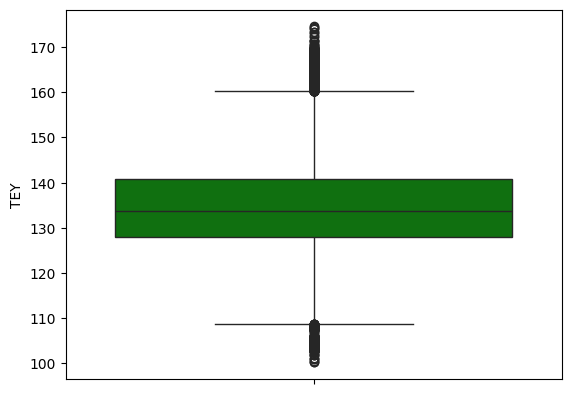

In [ ]:
sns.boxplot(df['TEY'], color = 'green')

In [ ]:
x=df.drop('TEY', axis=1)
y=df[['TEY']]

In [ ]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [ ]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [ ]:
#standardization
a =  StandardScaler()
a.fit(x)

StandardScaler()

In [ ]:
x_standarized = a.transform(x)
pd.DataFrame(x_standarized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:

from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
def create_model(learning_rate , dropout_rate, activation_functon, init,neuron1,neuron2):
    model=sequential()
    model.add(Dense(neuron1,initdim=neuron1,kernal_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,initdim=neuron1,kernal_initializer=init,activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='Sigmoid'))
    adam=Adam(lr=lerning_rate)
    model_compile(loss='binary_crossentropy',optimizer=adam.metrics['accuracy'])
    return model

In [ ]:
#Define Gridsearch parametres
batch_size=[10,20,40]
epochs=[10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
activation_function=['softmax','relu','tanh','linear']
init=['unifrom','normal','zero']
neuron1=[4,8,16]
neuron2=[2,4,8]

In [ ]:
modell = Sequential()

In [ ]:
param_grid=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)

In [ ]:
grid=GridSearchCV(estimator=modell,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.src.engine.sequential.Sequential object at 0x7a3e09f3ce50>,
             param_grid={'activation_function': ['softmax', 'relu', 'tanh',
                                                 'linear'],
                         'batch_size': [10, 20, 40],
                         'dropout_rate': [0.0, 0.1, 0.2],
                         'epochs': [10, 50, 100],
                         'init': ['unifrom', 'normal', 'zero'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'neuron1': [4, 8, 16], 'neuron2': [2, 4, 8]},
             verbose=10)

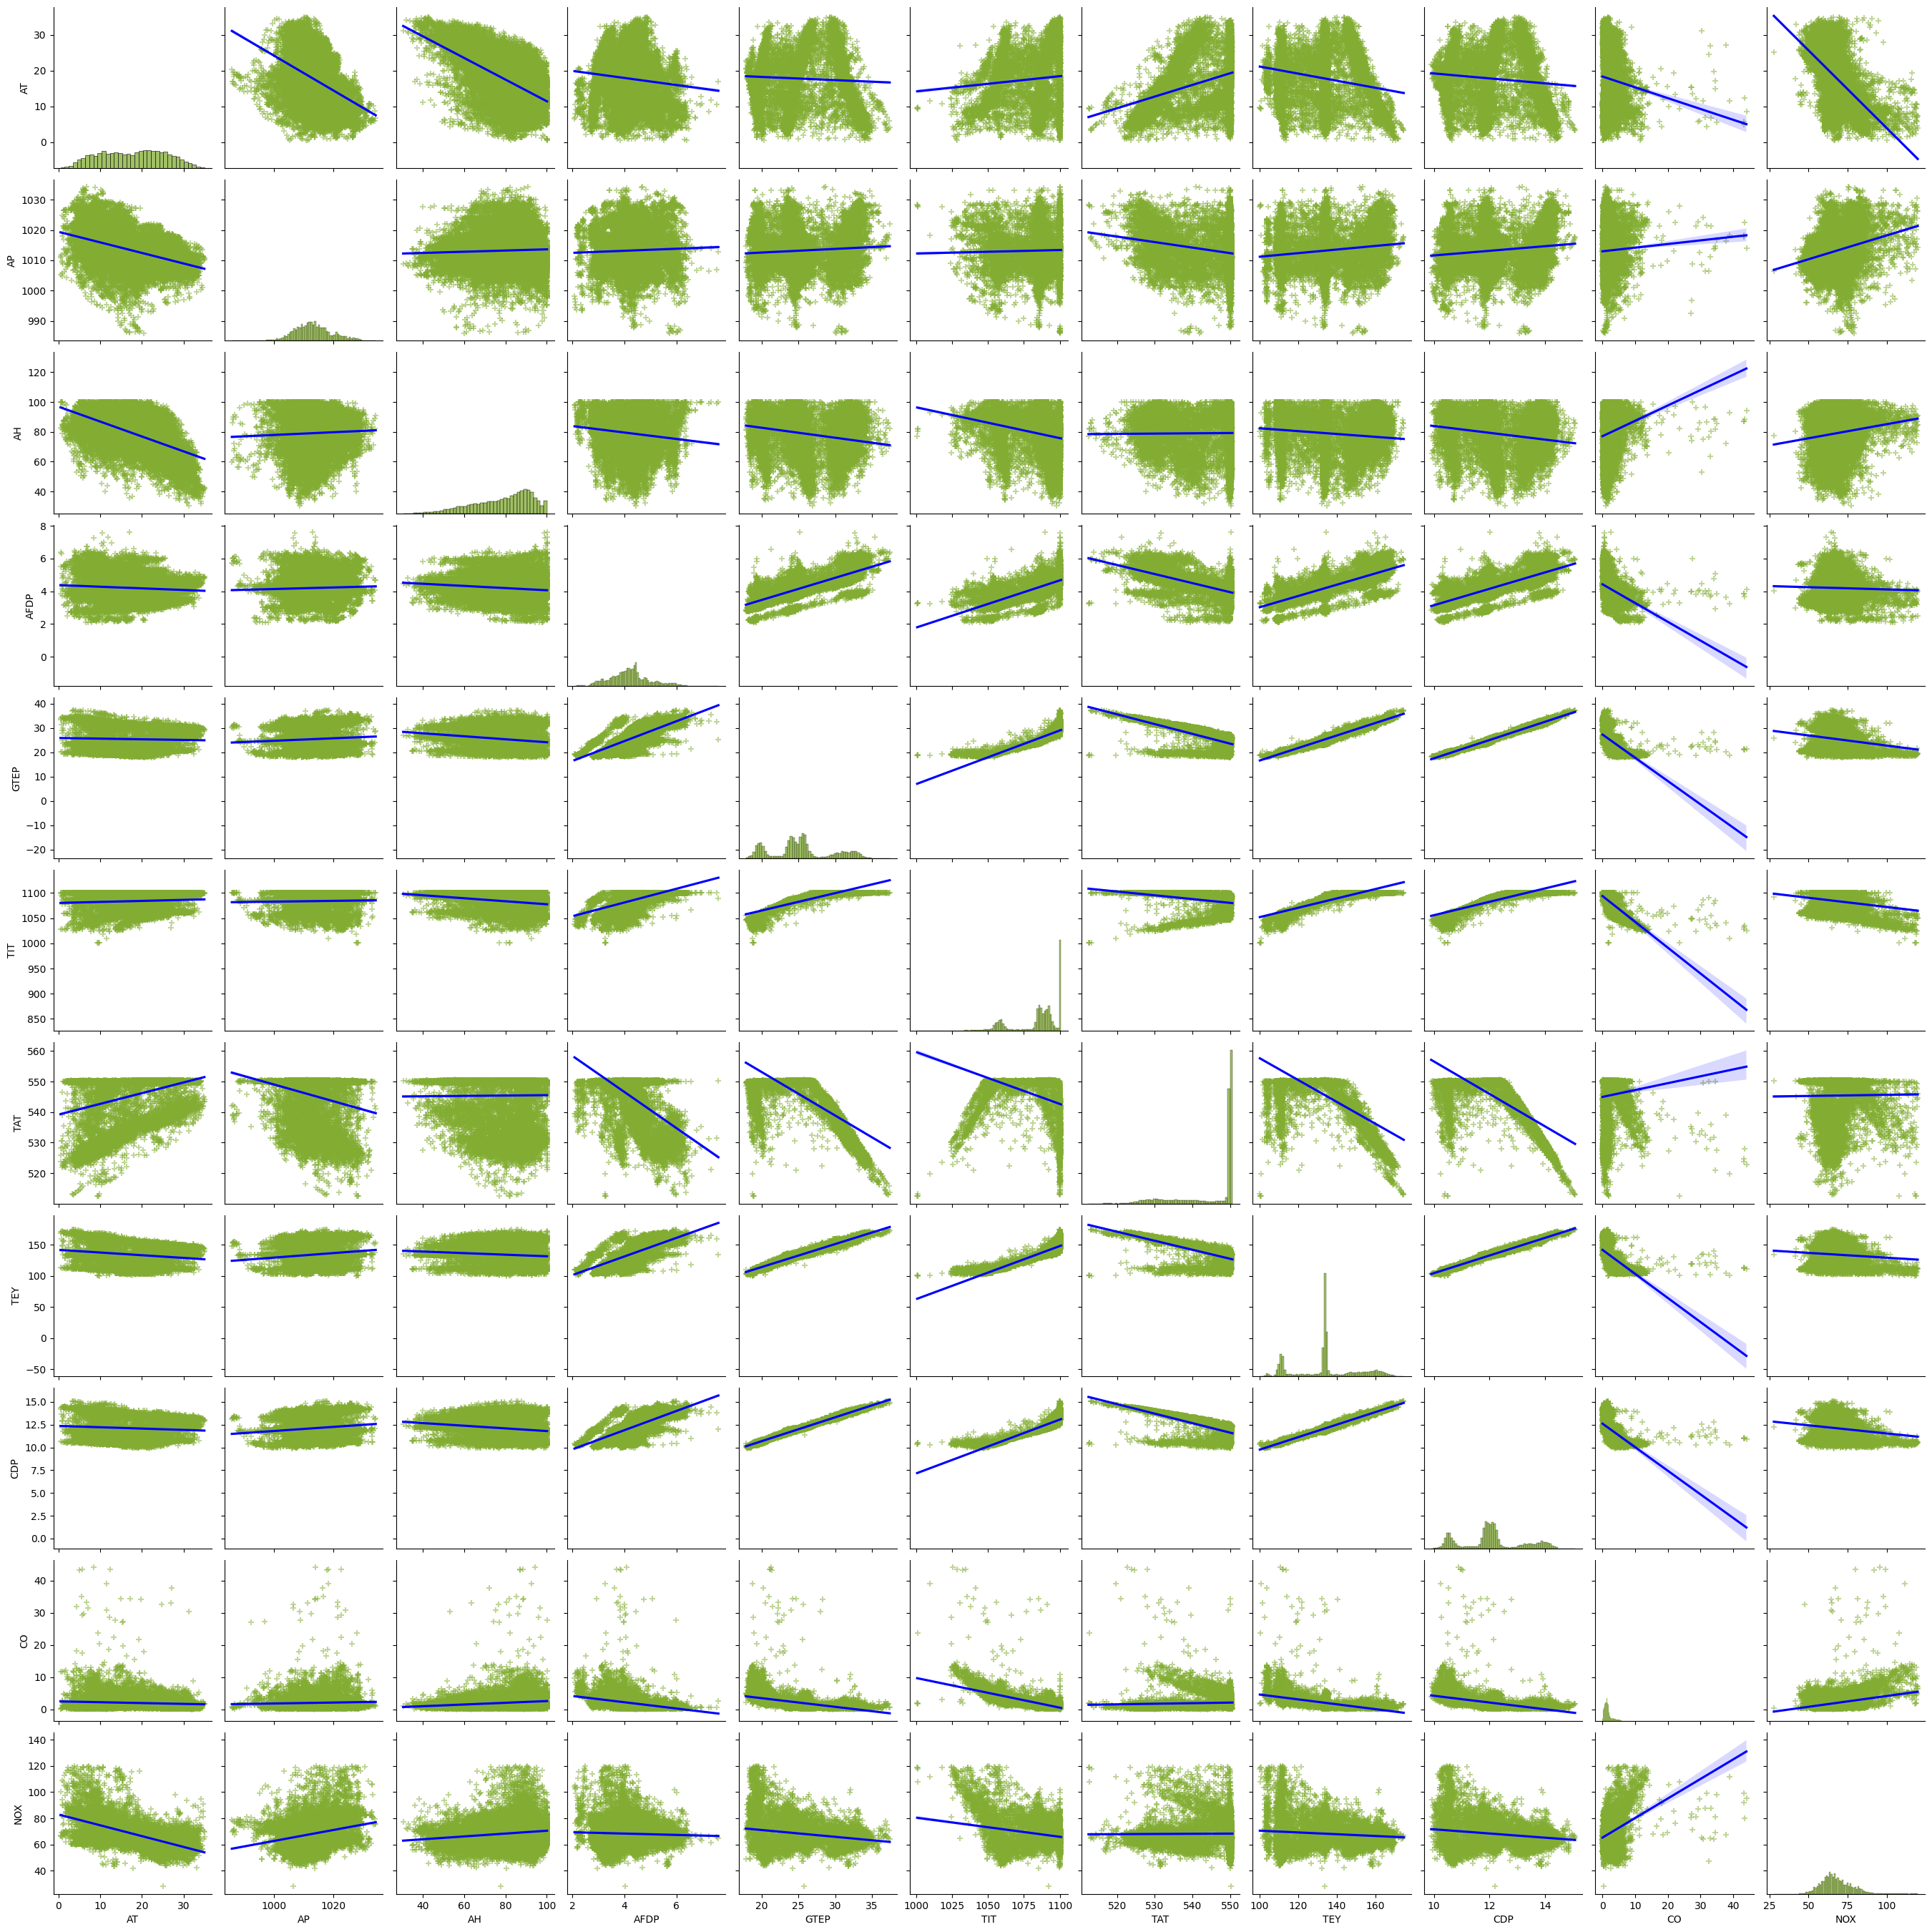

In [ ]:
sns.pairplot(df,
                markers = '+',
                kind = 'reg',
                diag_kind = "auto",
                plot_kws = {'line_kws':{'color':'Blue'},
                            'scatter_kws' : {'alpha' : 0.5, 'color' : '#82ad32'}},

                diag_kws = {'color' : '#82ad32'})

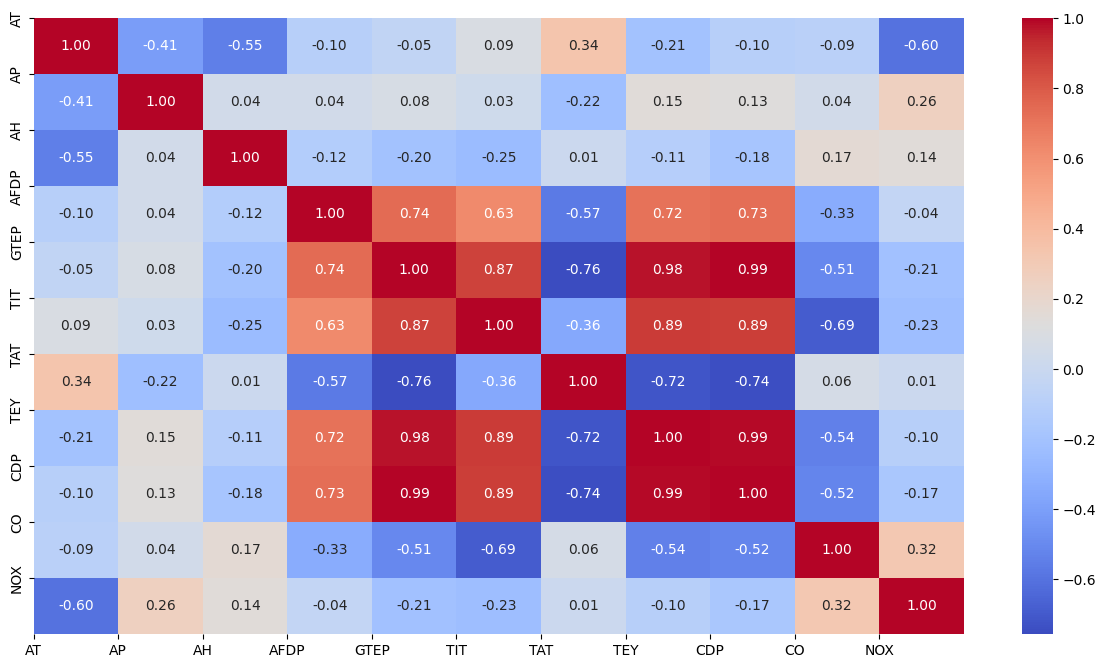

In [ ]:
# Heatmap of correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
X = df.drop(columns = ['TEY'], axis = 1)
y = df.iloc[:,7]
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [ ]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([

                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 2907.4814 - mean_squared_error: 2907.4814 - val_loss: 224.0534 - val_mean_squared_error: 224.0534 - 3s/epoch - 9ms/step
Epoch 2/100
381/381 - 1s - loss: 106.8056 - mean_squared_error: 106.8056 - val_loss: 78.2749 - val_mean_squared_error: 78.2749 - 1s/epoch - 4ms/step
Epoch 3/100
381/381 - 1s - loss: 43.8760 - mean_squared_error: 43.8760 - val_loss: 35.7917 - val_mean_squared_error: 35.7917 - 835ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 22.1237 - mean_squared_error: 22.1237 - val_loss: 18.8223 - val_mean_squared_error: 18.8223 - 747ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 12.4113 - mean_squared_error: 12.4113 - val_loss: 12.6304 - val_mean_squared_error: 12.6304 - 819ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 7.3782 - mean_squared_error: 7.3782 - val_loss: 6.4199 - val_mean_squared_error: 6.4199 - 799ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 4.6326 - mean_squared_error: 4.6326 - val_loss: 3.6849 - val_mean_squ

In [ ]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.5234 - mean_squared_error: 1.5234


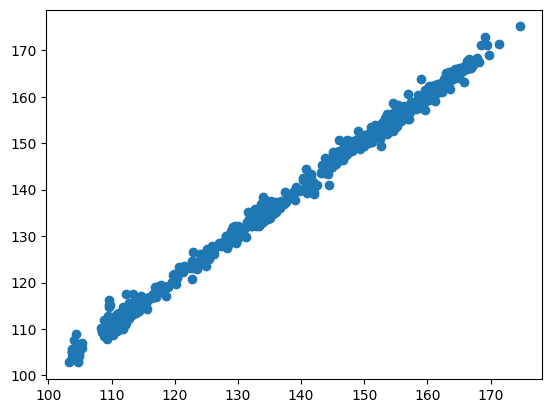

In [ ]:
predictions = model.predict_on_batch(X_test_scaled)
plt.scatter(y_test, predictions)

In [ ]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,136.039398,1.174623
1,111.88,112.290436,0.366854
2,133.72,135.571365,1.384509
3,133.79,135.225708,1.073106
4,110.77,110.423973,0.312383
...,...,...,...
1499,132.85,134.621872,1.333739
1500,125.07,127.209282,1.710468
1501,160.95,161.352478,0.250064
1502,133.12,134.346832,0.921599
